# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** MNIST with fully connected layers<br>

</font>
</div>

# Theoretical recall: the LAYER

<div class="alert alert-block alert-info">
<font color=black><br>

- The core building block of neural networks is the **layer**, a data-processing module that you can think of as a filter for data. 
- Specifically, layers extract representations out of the data. Representations that are more meaningful for the problem at hand. 
- Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. 
- A deep-learning model is like a **sieve** for data processing, made of a succession of increasingly refined data filters—the layers. 

<br></font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the datatest

<div class="alert alert-block alert-info">
<font color=black>

The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9. 
The images and labels have a one-to-one correspondence.

</font>
</div>

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Get the number of axes of the tensor
print(train_images.ndim)
# Get the number of element for each axis
print(train_images.shape)
# Get the data type, the dtype attribute: 
print(train_images.dtype)

3
(60000, 28, 28)
uint8


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<div class="alert alert-block alert-info">
<font color=black><br>

- It’s an array of 60,000 matrices of 28 × 8 integers (8-bit integers).  
- Each such matrix is a grayscale image, with coefficients between 0 and 255.

<br></font>
</div>

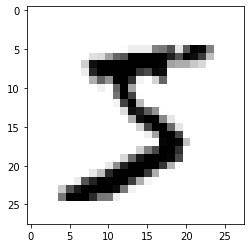

In [7]:
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Preprocessing

<div class="alert alert-block alert-info">
<font color=black><br>

- **Original:** array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. 
- **After**: float32 array of shape (60000, 28 * 28) with values between 0 and 1.

<br></font>
</div>

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

<div class="alert alert-block alert-info">
<font color=black><br>

We also need to categorically ancode the label

<br></font>
</div>

In [12]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Building a fully connected NN

<div class="alert alert-block alert-info">
<font color=black><br>

- First, we’ll feed the neural network the training data, train_images and train_labels. 
- The network will then learn to associate images and labels. 
- Finally, we’ll ask the network to produce predictions for test_images, and we’ll verify whether these predictions match the labels from test_labels.
- The second (and last) layer is a 10-way **softmax** layer, which means it will return an array of 10 probability scores (sum- ming to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

<br></font>
</div>

In [13]:
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

<div class="alert alert-block alert-info">
<font color=black><br>

- A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direc- tion.
- An optimizer—The mechanism through which the network will update itself based on the data it sees and its loss function.
- Metrics to monitor during training and testing—Here, we’ll only care about accu- racy (the fraction of the images that were correctly classified).

<br></font>
</div>

In [14]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model

<div class="alert alert-block alert-info">
<font color=black><br>

- Categorical_crossentropy is the loss function that’s used as a feedback signal for learning the weight tensors, and which the training phase will attempt to minimize. 
- The reduction of the loss happens via mini- batch stochastic gradient descent. 
- The exact rules governing a specific use of gradient descent are defined by the **rmsprop** optimize.
- The network will start to iterate on the training data in mini-batches of 128 samples, 5 times over (each iteration over all the training data is called an epoch). 
- At each iteration, the network will compute the gradients of the weights with regard to the loss on the batch, and update the weights.
- Each iteration over all the training data is called an epoch 
- After these 5 epochs, the network will have performed 2,345 (469*5) gradient updates (469 (~60,000/128) per epoch)

<br></font>
</div>

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2551 - accuracy: 0.9274
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1038 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0683 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0373 - accuracy: 0.9886


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 932us/step - loss: 0.0896 - accuracy: 0.9744
test_acc: 0.974399983882904


# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://github.com/fchollet/deep-learning-with-python-notebooks
- Chollet, Francois. Deep learning with Python. Vol. 361. New York: Manning, 2018

</font>
</div>

# Conclusion

<div class="alert alert-block alert-danger">
<font color=black><br>

- The test-set accuracy turns out to be 97.8%, that’s lower than the training set accuracy. 
- This gap between training accuracy and test accuracy could be an example of overfitting.
- **Overfitting** is the fact that machine-learning models tend to perform worse on new data than on their training data

<br></font>
</div>